# Plotting quick reference
We've covered several plot types and options. Here is a quick overview. The matplotlib notebooks have more detail; this notebook is meant to jog your memory. The [documentation](https://matplotlib.org/contents.html#) is always a good place for answers. We like the [gallery](https://matplotlib.org/gallery/index.html), too.

## Big overview
1. Use `fig, ax = subplots(nrows, ncols, figsize=(height, width))` to generate a figure and axes
2. Add plots to axes e.g. `ax.plot(x,y)`
3. Add labels, titles, and legends (this step is not optional!)
4. Add text or other annotations
5. Call `plt.show()` to show the figure

In [1]:
# We need pandas to manage data, matplotlilb to plot, datetime to handle dates, and datareader to get data. 

import pandas as pd     #load the pandas package and call it pd
import matplotlib.pyplot as plt   # load the pyplot set of tools from the package matplotlib. Name it plt for short.
from pandas_datareader import data, wb    # we are grabbing the data and wb functions from the package
import datetime as dt                     # for time and date

# The following is a jupyter magic command. It tells jupyter to insert the plots into the notebook
# rather than a new window.
%matplotlib inline      

## Options
These options work for most plot types (and these are not all the options!). You can always check the [documentation](https://matplotlib.org/). Typically useage is to list the options, separated by commas. 
```python
ax.plot(x, y, option1, option2, option3)
```
### Lines
* line color: `color = 'red'` (or blue, black, green...)
* line width: `linewidth = 1.2` (bigger numbers are thicker lines)
* line style: `linestyle = :` ([docs](https://matplotlib.org/2.0.2/api/lines_api.html); solid is '-'; dashed is '--'; dotted is ':') 
* alpha: `alpha = 0.5` (alpha in (0,1), smaller lighten the line color when the background is white)

### Markers
For line and scatter plots, data markers are very customizable. 
* `marker = '.'` ([docs](https://matplotlib.org/api/markers_api.html?highlight=marker#module-matplotlib.markers); a dot is '.'; triangle up is '^'; a plus is '+'; a square is 'x') 
* `s = 15` (larger numbers are larger markers) #  I can't get 'markersize' to work...

### Spines
Turns off lines on the box around the figure. 
```python
ax.spines['right'].set_visible(False) # (right, left, top, bottom)
```

### Add text to the figure
`text()` just adds text (duh) while `annotate()` adds text and an arrrow. 
```python
ax.text(x, y, 'text')

# xy is where the arrow points, xytext is where the text goes
# the arrow properties are stored in a dict and passed to annotate
my_props = {'facecolor':'black',  'arrowstyle':'->'}
ax.annotate('text', xy=(x,y), xytext=(x,y), arrowprops = my_props) 
```

### Legends
You can add a label to the plot command to set up the legend text,
```
label = 'legend text'
```
then call the legend method to turn the legend on.
```
ax.legend(frameon = False)  # frameon controls the box around the legend
```

### Add horizontal or vertical lines
```python
ax.axhline(y=y_val, color='black')  # adds a horizontal line at y_val
ax.axvline(x=x_val, color='black')  # adds a vertical line at x_val
```


## Time series plots

Time on the x-axis and data on the y-axis.

**Important**: We need to set up the dates as datetime objects.

In [2]:
# Grab some data
# Get GDP and consumption data from FRED
start = dt.datetime(1970, 1, 1)
gdp_data = data.DataReader(['GDPCA','PCECA'], 'fred', start)
gdp_data.head()

,GDPCA,PCECA
DATE,,
1970-01-01,4951.262,646.724
1971-01-01,5114.325,699.937
1972-01-01,5383.282,768.153
1973-01-01,5687.207,849.575
1974-01-01,5656.465,930.161


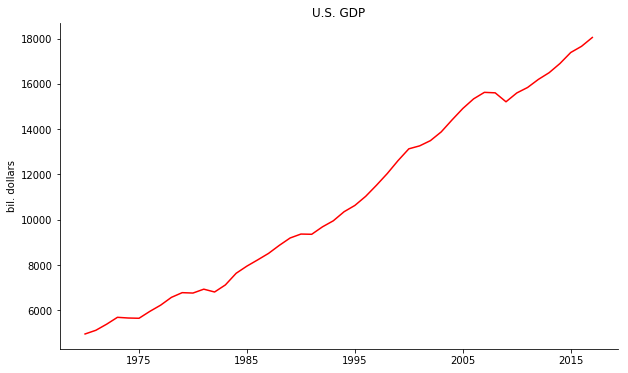

In [3]:
# The index is already set to the date and the date is set to datetime. (Thanks FRED!) So we are ready to plot.
# If it wasn't, we would call gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(gdp_data.index, gdp_data['GDPCA'], color='red')
ax.set_ylabel('bil. dollars')
ax.set_title('U.S. GDP')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 


## Histograms
How frequently does data occur? This plot tells the reader about the distribution of a variable. Let's plot the distribution of GDP growth rates.

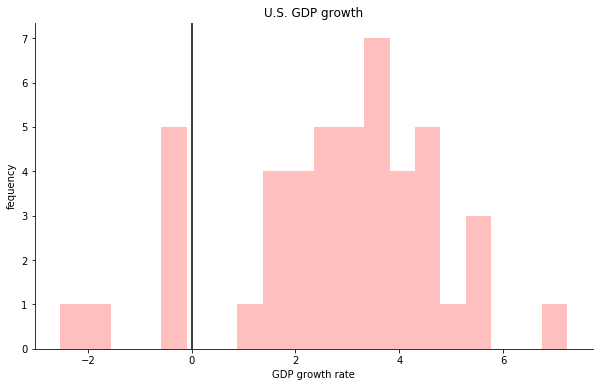

In [4]:
# Compute growth rates with pct_change
gdp_data['gdp_gr'] = gdp_data['GDPCA'].pct_change()*100  # multiply by 100 to get percentages

fig, ax = plt.subplots(figsize=(10,6))

# bins is a hist-specific option: the number of bars to create: how fine to bin the data
# the growth rate calc creates a missing value for the first data point. We MUST drop it, or hist fails.
ax.hist(gdp_data['gdp_gr'].dropna(), color='red', alpha=0.25, bins=20)  

# add a line a x=0
ax.axvline(x=0, color='black')

ax.set_ylabel('fequency')
ax.set_title('U.S. GDP growth')
ax.set_xlabel('GDP growth rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 


## Scatter plots
Plots two variables against each other. Great for showing the correlation between two variables. Let's plot the growth rate of GDP against the growth rate of consumption. What do we do with our extra income?

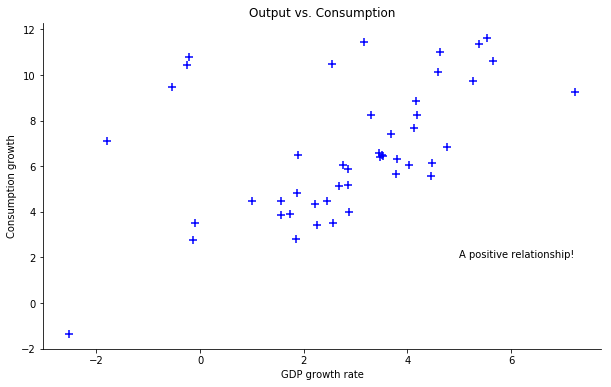

In [5]:
# Compute growth rates with pct_change
gdp_data['cons_gr'] = gdp_data['PCECA'].pct_change()*100  # multiply by 100 to get percentages

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(gdp_data['gdp_gr'], gdp_data['cons_gr'], color='blue', marker = '+', s=50)  # s is marker size

ax.set_title('Output vs. Consumption')
ax.set_ylabel('Consumption growth')
ax.set_xlabel('GDP growth rate')

# Add some text to the figure
ax.text(5, 2, 'A positive relationship!')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show() 

## Bar plots
One axis is categorical and the other is quantitative. Good for relatively few data points. Our go-to replacement for the pie chart. 

In [8]:
# A fake dataset of sodas and my rankings of them
soda_dict = {'brand':['coke', 'pepsi', 'root beer', 'plain seltzer', 'sprite'], 'ranking':[7,5,2,10,3]}

# Make a datframe
soda = pd.DataFrame(soda_dict)

# Set the brand to the index
soda.set_index('brand', inplace=True)

# sort it, so the figure is sorted
soda.sort_values('ranking', inplace=True)
soda

,ranking
brand,
root beer,2
sprite,3
pepsi,5
coke,7
plain seltzer,10


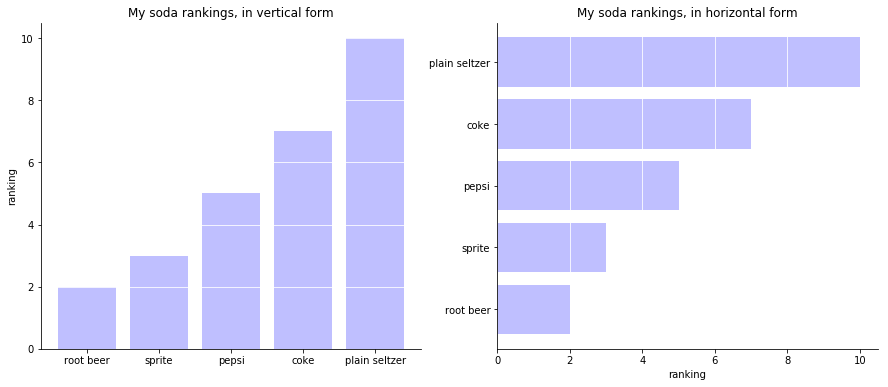

In [9]:
# Create two axes on one figure
fig, ax = plt.subplots(1, 2, figsize=(15,6))

# make a vertical bar chart on the first axis
ax[0].bar(soda.index, soda['ranking'], color='blue', alpha=0.25)  

ax[0].set_title('My soda rankings, in vertical form')
ax[0].set_ylabel('ranking')


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# add gridlines
ax[0].grid(axis='y', color='white')

# make a horizontal bar in the other axes
ax[1].barh(soda.index, soda['ranking'], color='blue', alpha=0.25)  

ax[1].set_title('My soda rankings, in horizontal form')
ax[1].set_xlabel('ranking')


ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# add gridlines
ax[1].grid(axis='x', color='white')

plt.show() 